# `PyGraph` pour manipuler des graphes

Appréhender dans un objet les deux aspects des graphes :

1. structure mathématique : module `networkx`
2. _dessin_ : module `graphviz`

## Exemple : Activité de 2-Coloration

### Visualiser...

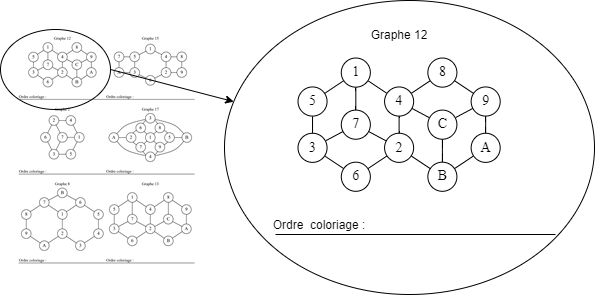

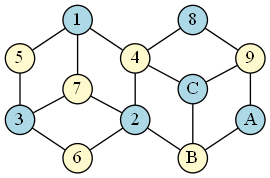

### Manipuler... y compris dans un programme

puisque...

Nettoyage des données et création d'un fichier `csv` de 250 entrées.

```
5,12534687,,
13,51427356C89A9,,
17,168972A5B,,
1,87653214,,
11,DB61C78912345,,
8,B65432A9871,,
17,189765432AB,15432,8976AB
16,186793542AB,15432,8976AB
...
5,12658743,143287,67
10,128B742A935,168B23,74A95
2,4217653,4765,213
6,854673128,73128,8546
5,12534687,1458,2367
```

**Un fichier `json` pour stocker les infos des graphes...**

```python
[
    [0, []],
    [8, [[0,1], [1,2], [2,4], [4,6], [6,7], [7,5], [5,3], [3,0], [4,5]]],
    [7, [[0,4], [4,2], [0,6], [0,3], [2,6], [2,5], [5,1], [6,1], [1,3]]],
    [0, []],
    [8, [[0,5], [5,7], [5,3], [5,4], [7,6], [6,4], [4,1], [4,2], [2,3]]],
    ...
    [11, [[0,5], [0,7], [0,8], [0,6], [1,5], [1,6], [1,9], [2,5], [2,7], 
          [3,6], [3,8], [4,7], [4,8], [4,10], [9,2], [9,3], [10,3], 
          [10,2]]]
]
```

**Une fonction pour créer tous les graphes...**

```python
def create_list_of_graphs():
    l_graphs = [None]
    with open('graphes.json') as file_in:
        datas = json.load(file_in)
        for nodes_count, edges in datas:
            g = pygraph.Graph(nodes_count)
            g.add_edges_from(edges)
            l_graphs.append(g)
    return l_graphs
```

```python
G = create_list_of_graphs()
```

**Et pouvoir les manipuler...**

```python
for i in range(17):
    G[i].colorise()
```

```python
def is_bfs(ordre, g):
    ordre = [int(e, 16)-1 for e in ordre]
    niveaux = g.bfs(ordre[0])
    return verifier(ordre, niveaux)
```

```python
>>> is_hamiltonien('15482367', G[5])
False
>>> is_bfs('4217653', G[2])
True
>>> verif_solution(G[8], 'B815A3', '76924')
True
``` 

## Importer et utiliser `pygraph`

In [15]:
import pygraph

### Créer un graphe aléatoire (non orienté)

In [16]:
alea = pygraph.Graph(6, random=True)

### Visualiser

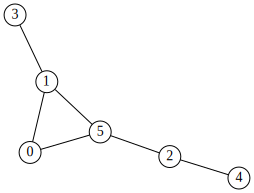

In [17]:
alea.view

### Créer un graphe sans arète

In [18]:
g7 = pygraph.Graph(7)

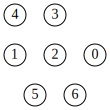

In [19]:
g7.view

### Ajouter une arête

In [20]:
g7.add_edge(0, 2)

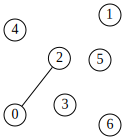

In [21]:
g7.view

### Ajouter plusieurs arêtes

In [22]:
g7.add_edges_from([(0,4), (4,2), (0,6), (0,3), (2,6), (2,5), (5,1), (6,1), (1,3)])

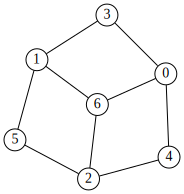

In [26]:
g7.view

### Retirer des arêtes

In [24]:
g7.remove_edge(0, 2)

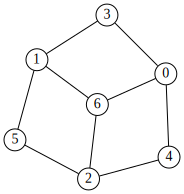

In [25]:
g7.view

### Retrait de noeuds

In [27]:
g7.remove_node(6)

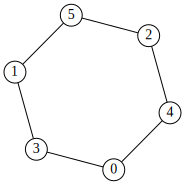

In [28]:
g7.view

### Positionner les sommets

In [29]:
G2 = pygraph.Graph(7)
G2.add_edges_from([(0,4), (4,2), (0,6), (0,3), (2,6), (2,5), (5,1), (6,1), (1,3)])

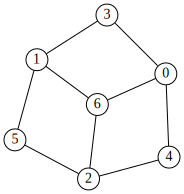

In [30]:
G2.view

In [31]:
G2.position([(6, 0, 0), (5, -1, 0), (0, 1, 0), 
             (2, -0.5, -1), (1, -0.5, 1), 
             (4, 0.5, -1), (3, 0.5, 1)])

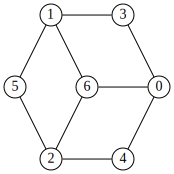

In [32]:
G2.view

### Changer l'échelle

In [33]:
G2.scale(0.7)

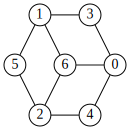

In [34]:
G2.view

### Bouger un sommet

_todo : corriger le bug qui fait que l'échelle n'est pas conservée_

In [35]:
G2.move(0, 1, 0)

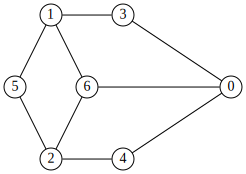

In [36]:
G2.view

In [37]:
G2.scale(0.7)

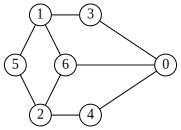

In [38]:
G2.view

### Changer les étiquettes

In [39]:
G2.label_off()

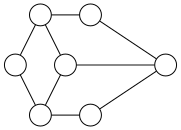

In [40]:
G2.view

In [41]:
PEOPLE = '🧑🧒🧓🧔👦👧👨👩👴👵👶'

In [42]:
G2.set_labels(PEOPLE)

In [43]:
G2.label_on()

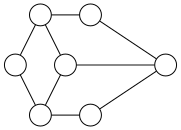

In [44]:
G2.view

### Changer la taille d'un sommet

In [45]:
G2.label_off()

In [46]:
G2.resize(0.1)

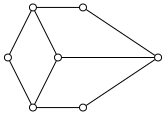

In [47]:
G2.view

In [48]:
G2.scale(0.3)

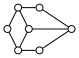

In [49]:
G2.view

### Sauver dans un fichier

In [51]:
G2.write('small_g2', format='png')

## Algorithmes

### Coloration

In [52]:
G = pygraph.Graph(8)
G.add_edges_from([(0,4), (0,7), (0,6), (0,5), (5,1), (5,6), (6,7), (7,4), (4,3), (3,2)])
G.position([(7, -0.5, 0), (6, 0.5, 0), (0, 0, 1), (4, -1.5, 0), (5, 1.5, 0), (1, 1.5, -1), (2, 0, -1), (3, -1.5, -1)], 0.7)

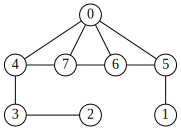

In [53]:
G.view

#### Étude de l'algorithme de Welsh-Powell

In [54]:
class WelshPowell:
    
    def __init__(self, g):
        self.g = g.copy()
        self.g.same_position_as(g)
        self.g.scale(0.7)
        self.nodes = sorted(self.g.node_ids(), key=lambda s:self.g.degree(s), reverse=True)
        self.node_id = -1
        self.color_id = 0
        self.state = 0
        self.colors = [-1] * len(self.nodes)
    
    def node(self):
        return self.nodes[self.node_id]
    
    def fini(self):
        return all(self.colors[i] != -1 for i in range(len(self.nodes)))
    
    def deja_colores(self):
        """renvoie la liste des noeuds avec la couleur courante color_id"""
        return [nid for nid in self.nodes if self.colors[nid] == self.color_id]
    
    def is_neighbor(self):
        """est-ce que le noeud courant  est voisin d'un noeud de la couleur courante ?"""
        return any(self.node() in self.g.neighbors(v) for v in self.deja_colores())
    
    def first_uncolored(self):
        for i in range(len(self.nodes)):
            s = self.nodes[i]
            if self.colors[s] == -1:
                self.node_id = i
                break

    def is_colored(self):
        return self.colors[self.node()] != -1
        
    def first_isolated(self):
        self.node_id += 1
        while self.node_id < len(self.nodes) and (self.is_colored() or self.is_neighbor()):
            self.node_id += 1
    
    def color(self):
        s = self.node()
        self.colors[s] = self.color_id
        self.g.color_on(s, self.color_id)
    
    def step(self):
        if not self.fini():
            if self.state == 0:
                self.first_uncolored()
                self.color()
                self.state = 1
            else:
                self.first_isolated()
                if self.node_id >= len(self.nodes):
                    self.node_id = 0
                    self.state = 0
                    self.color_id += 1
                    self.step()
                else:
                    self.color()
        return self.g.view    

In [55]:
WP = WelshPowell(G)

In [56]:
WP.nodes

[0, 4, 5, 6, 7, 3, 1, 2]

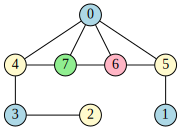

In [64]:
WP.step()

#### L'algorithme DSATUR

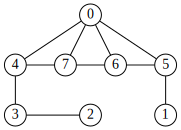

In [65]:
G1 = G.copy()
G1.same_position_as(G)
G1.scale(0.7)
G1.view

In [66]:
G1.colorise()

3

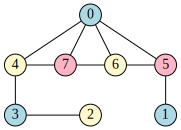

In [67]:
G1.color_on()
G1.view

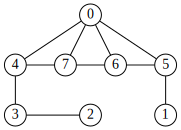

In [68]:
G1b = G.copy()
G1b.same_position_as(G)
G1b.scale(0.7)
G1b.view

Cet algorithme est présent dans _networkx_

In [69]:
G1b.greedy_color('DSATUR')

{0: 0, 4: 1, 7: 2, 6: 1, 5: 2, 3: 0, 1: 0, 2: 1}


3

In [ ]:
G2.colorise()

In [ ]:
G2.color_on()
G2.view

### Parcours

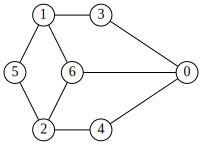

In [70]:
G2.resize()
G2.set_labels('0123456')
G2.label_on()
G2.scale(0.8)
G2.view

**En largeur**

In [71]:
G2.bfs(6)

[[6], [0, 2, 1], [4, 3, 5]]

In [72]:
G2.bfs(0)

[[0], [4, 6, 3], [2, 1], [5]]

In [73]:
list(G2.neighbors(0))

[4, 6, 3]

In [74]:
G2.degree(5)

2

## Modélisation du jeu de Lewthwaite

In [75]:
import lewthwaite as lw

In [76]:
jeu = lw.Lewthwaite(5)

In [77]:
jeu.start()

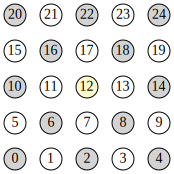

In [78]:
jeu.view

In [ ]:
jeu.graph.write('debut', format='png')

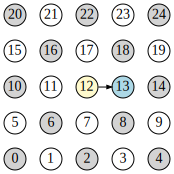

In [79]:
jeu.play(13)

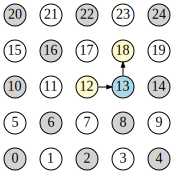

In [80]:
jeu.play(18)

In [81]:
jeu.reset()

In [82]:
jeu.random()

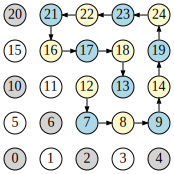

In [83]:
jeu.view

## La suite...

Un TER de M1 pour :

1. Ajouter des fonctionnalités :
    - mieux gérer les étiquettes et la taille des sommets
    - gérer les graphes pondérés
    - ajouter des algo classiques
    - générer les listes d'adjacences
    - ...
2. En faire un **vrai** module pip
3. Rédiger de vraies activités pédagogiques autours des algos de graphe


## Et pour finir...

Au moment de terminer ce notebook, je me suis souvenu que c'était l'anniversaire de ma belle-soeur.  J'ai récupéré le _pygraph_ associé au jeu de lewthwaite :

In [ ]:
g = jeu.graph

In [ ]:
g.view

J'ai changé les étiquettes...

In [ ]:
MSG = 'SAI🌸🌼RERE🌼IVJO🌷N🌸XY💮NAUE🌼'

In [ ]:
g.set_labels(MSG)
g.label_on()

In [ ]:
g.view

J'ai _joué_ les coups qu'il fallait pour faire le message...

In [ ]:
jeu.auto([13,18,23,22,17,16,21,20,15,10,11,6,5,0,1,2,7,8,3,4,9,14,19,24])

Un peu de couleurs aléatoires...

In [ ]:
import random
for nid in g.node_ids():
    g.color_on(nid, random.randint(0,5))

In [ ]:
jeu.view

In [ ]:
g.write('anniv')